Project - Electricity Demand Forcasting 

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset
data = pd.read_csv(r"C:\Users\Mohammed\my_git_projects\electricity_demand_prediction_ML_model\electricity demand dataset.csv")
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [4]:
# check some basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [5]:
# Convert the column datatype to datetime format

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_26144\3418717716.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [7]:
# set datetime column as Dataframe's index

data.set_index('Timestamp', inplace = True)

In [8]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [9]:
# Using Describe function ro check summery statistics 
data[['Temperature', 'Humidity', 'Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [10]:
# check missing vales
data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [11]:
# show records that conatin any null values 

data[data.isna().any(axis = 1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [12]:
# show records that contain all null values

data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# drop all null values
data.dropna(inplace = True)

In [14]:
data.isnull().sum()

hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [15]:
# Create the 'Quarter' coulmn in the dataset

data.insert(5, "Quarter", data.index.quarter)

In [16]:
data.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'Quarter',
       'Temperature', 'Humidity', 'Demand'],
      dtype='object')

In [17]:
# change datatypes to intiger

data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43817 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43817 non-null  int32  
 1   dayofweek    43817 non-null  int32  
 2   month        43817 non-null  int32  
 3   year         43817 non-null  int32  
 4   dayofyear    43817 non-null  int32  
 5   Quarter      43817 non-null  int32  
 6   Temperature  43817 non-null  float64
 7   Humidity     43817 non-null  float64
 8   Demand       43817 non-null  float64
dtypes: float64(3), int32(6)
memory usage: 2.3 MB


In [19]:
# create week of the year

data.insert(5, 'weekofyear', data.index.isocalendar().week.astype(int))

In [20]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [21]:
# create new column to check the weekend

data.insert(7, 'is_weekend', data.index.dayofweek.isin([5,6]).astype(int))

In [43]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [49]:
# demand from the same hour yesterday & same hour last week

data['demand_lag_24hr'] = data['Demand'].shift(24)
data['demand_lag_168hr'] = data['Demand'].shift(168)

In [59]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,Demand,demand_lag_24hr,demand_lag_168hr
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014


In [65]:
# Rolling meand & Rolling Standard Deviation

data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window = 24).mean()
data['demand_rolling_std_24hr'] = data['Demand'].rolling(window = 24).std()

In [67]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,Demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [69]:
# Cleand Dataset
data.dropna(inplace = True)

In [71]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,Demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


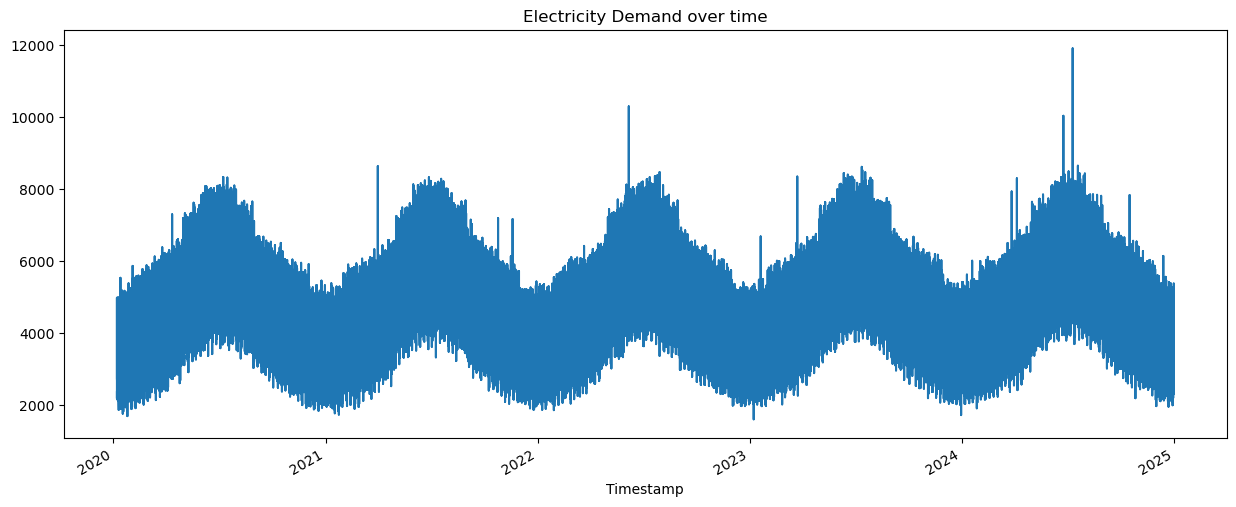

In [83]:
# plot demand over time 

data['Demand'].plot(figsize=(15,6))
plt.title("Electricity Demand over time")
plt.show()

Text(0.5, 1.0, 'Demand by hour of the day')

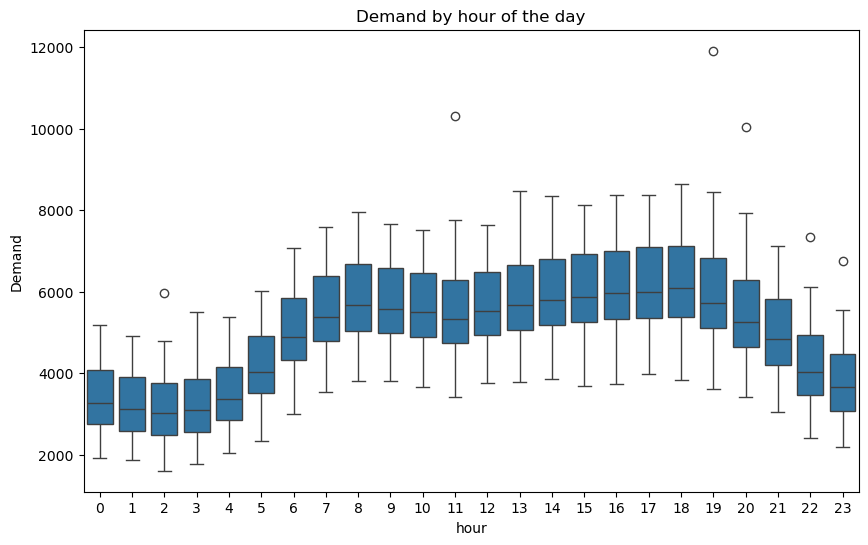

In [85]:
# visualize demand by hour of day
plt.figure(figsize= (10,6))
sns.boxplot(data = data, x ='hour', y='Demand')
plt.title("Demand by hour of the day")

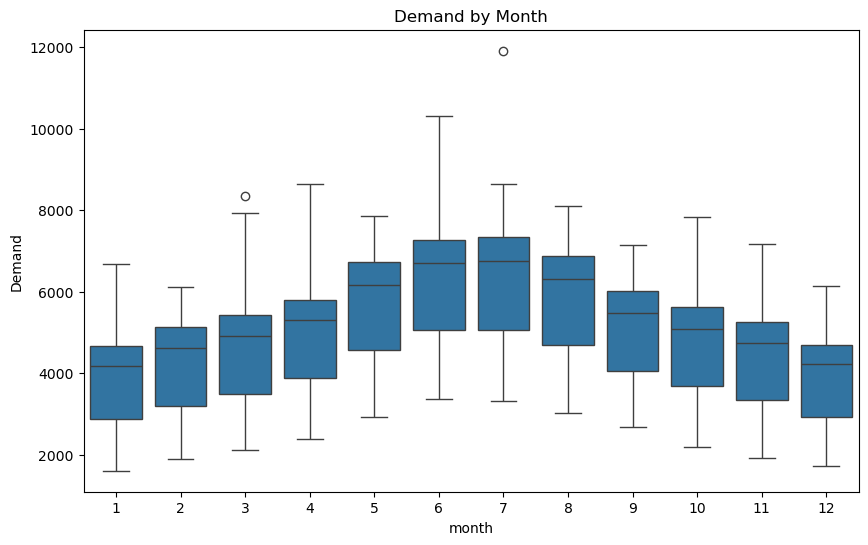

In [87]:
# visualize demand by month

plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = "month" , y = "Demand")
plt.title("Demand by Month")
plt.show()

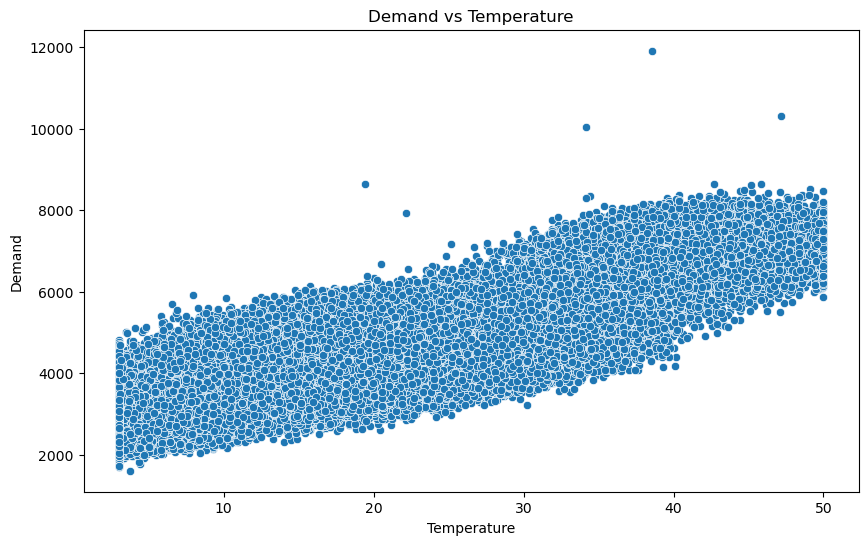

In [91]:
# Scatter plot of Demand vs Temperature

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x= "Temperature", y= "Demand")
plt.title("Demand vs Temperature")
plt.show()

<Axes: >

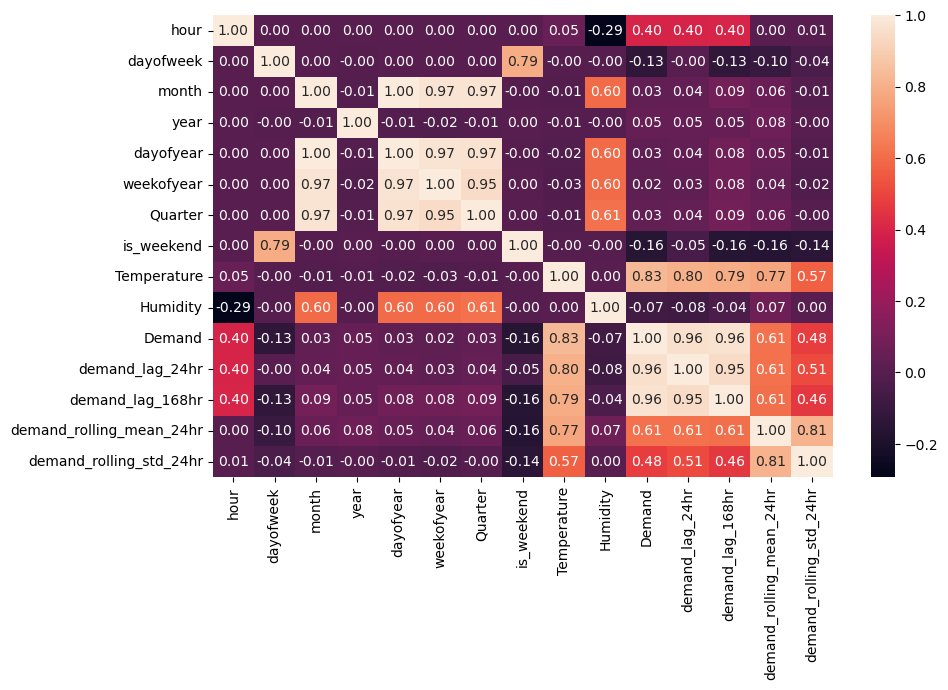

In [101]:
# Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot =True, fmt=".2f")


In [103]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,Demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [105]:
y = data.Demand

In [107]:
X = data.drop("Demand", axis =1)

In [109]:
print(y)

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 43649, dtype: float64


In [113]:
X

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [115]:
# Split Data into training and testing data

X_train = X.loc[ : '2023-12-31']     # taking 80% of data as training data

In [119]:
y_train = y.loc[ : '2023-12-31']     # taking 80% of data as training data

In [129]:
X_test = X.loc[ '2024-01-01':]

In [131]:
y_test = y.loc[ '2024-01-01':]

In [133]:
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,Quarter,is_weekend,Temperature,Humidity,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [135]:
y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8774, dtype: float64

In [141]:
print(X_train.shape)
print(y_train.shape)

(34875, 14)
(34875,)


In [143]:
print(X_test.shape)
print(y_test.shape)

(8774, 14)
(8774,)


Using XGBoost

In [152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [158]:
import xgboost

In [160]:
from xgboost import XGBRegressor

In [164]:
# From sklearn import two metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from  sklearn.model_selection import TimeSeriesSplit

In [166]:
# Initialize and Train the model

model_xgb = XGBRegressor(n_estimators = 1000, early_stopping_rounds =50,
                         learning_rate = 0.01, random_state = 42, objective = "reg:squarederror")

In [170]:
model_xgb.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [172]:
# make predictions

predictions_xgb = model_xgb.predict(X_test)

In [176]:
# Evaluate the model

rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))

mae_xgb = mean_absolute_error(y_test, predictions_xgb)

In [182]:
print('XGBoost RMSE:', rmse_xgb)
print('XGBoost MAE:', mae_xgb)

XGBoost RMSE: 183.08670635965433
XGBoost MAE: 127.37682963478566


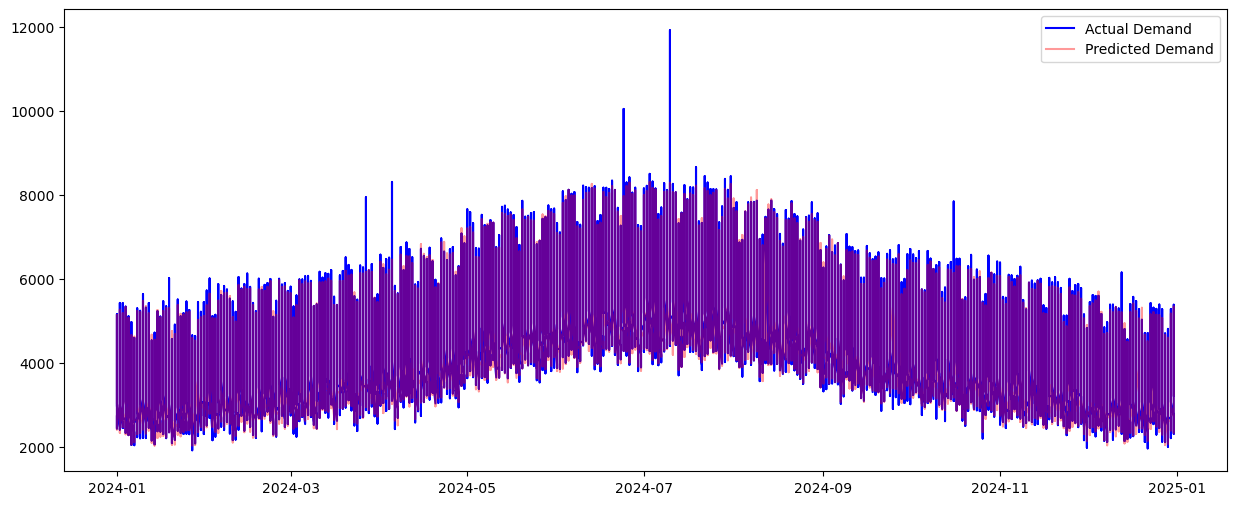

In [202]:
# Visualize the Predections

plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label = "Actual Demand", color = 'Blue')
plt.plot(y_test.index, predictions_xgb, label = 'Predicted Demand', color = 'Red', alpha = 0.4)
plt.legend()
plt.show()

In [204]:
# save the model

import joblib

joblib.dump(model_xgb, 'electricity_demand_xgb_model.pkl')

['electricity_demand_xgb_model.pkl']

In [206]:
# load and use

loaded_model = joblib.load('electricity_demand_xgb_model.pkl')

# future_predections = loaded_model.predict(X_future)